<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Marco Antonio Sanchez Covarruvias, José Alberto Mayagoitia Gutiérrez

**Fecha:** 14 de octubre del 2021.

**Expediente** : if720268, if720266
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MarcoSC08/ProyectoSPFFinal_MASanchez_JAMayagoitia

# Proyecto TEMA-2

### Simulación casos COVID-19

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.
> Casos de COVID-19 como base muestra Estados Unidos

### 1.2 Objetivos.
> #### 1.1 Objetivo general.
> Simular los distintos escenarios mediante los datos reales de casos positivos y estudiar el comportamiento del virus en un corto-mediano plazo.
> #### 1.2 Objetivos específicos
> - Simular la probabilidad de defunción en caso de ser positivo de COVID-19.
> - Simular la probabilidad de recuperación en caso de ser positivo de COVID-19.
 > - Simular la probabilidad de hospitalización en caso de ser necesario por COVID-19.

### 1.3 Definición del problema.
> Todos los países nos enfrentamos en este momento a la pandemia del coronavirus y, con ella, a la crisis económica y a la drástica pérdida de empleos. Instituciones internacionales han exhortando a los distintos gobiernos para contener los graves efectos que el Covid-19 traerá consigo. Las naciones del mundo han diseñado estrategias para aminorar el número de contagios y diseñar políticas para enfrentar la crisis económica y psicológica que esto trae en las familias.

<img style="float: left; margin: 15px 15px 15px 15px;" src="https://918429.smushcdn.com/2325059/wp-content/uploads/2020/03/crisis-coronavirus.png?lossy=1&strip=1&webp=1" width="350px" height="700px" />

> El nuevo coronavirus se conoce como SARS-CoV-2 por sus similitudes con el virus que causa el SARS y fue identificado a principios de enero de 2020 por científicas y científicos chinos. Este virus causa la enfermedad llamada COVID-19. Nuestra comprensión colectiva del virus y de la enfermedad aún está evolucionando. El virus se puede transmitir de persona a persona, incluso por aquellas que no presentan síntomas.

> Estados Unidos siendo la potencia económica número 1 del mundo, es un parteaguas para explorar el manejo de la situación global. Mediante la simulación de las variables seleccionadas, buscamos estimar y predecir el comportamiento del COVID-19 para este país y una noción del mundo.

> Siendo este uno de los virus con mayor tasa de contagios en la historia, a pesar de su baja tasa de mortalidad a ya casi dos años de pandemia, el virus se sigue haciendo presente y sigue tomando importancia en nuestro día a día.




### Diagrama

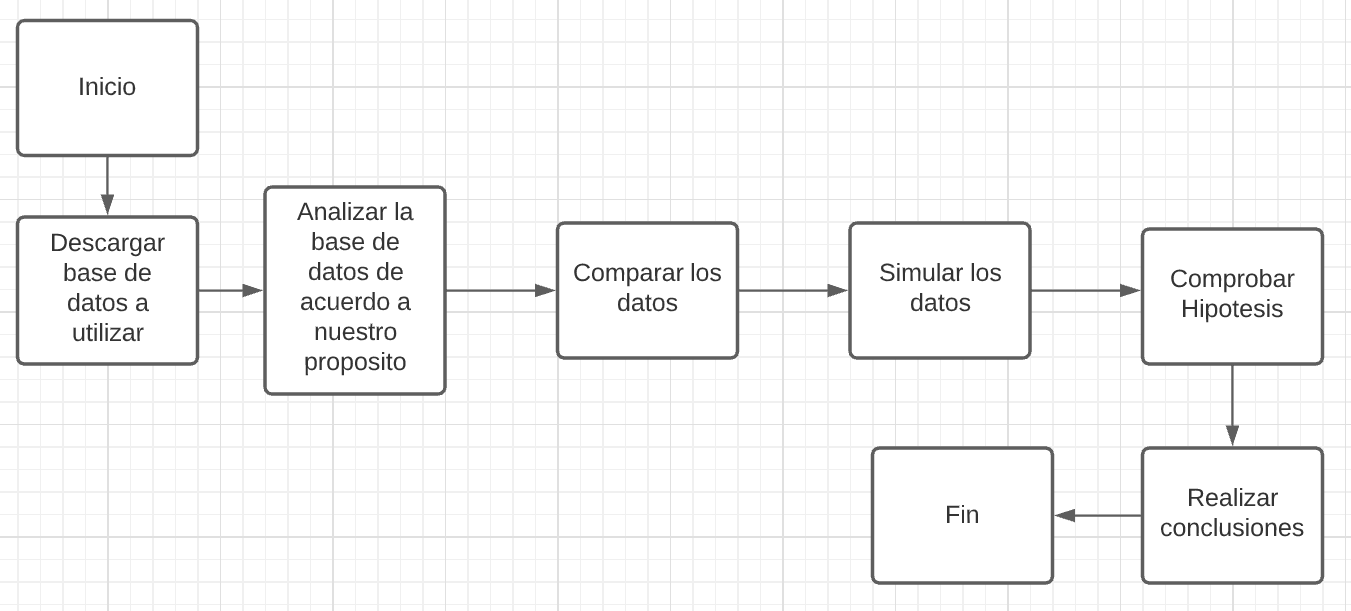

In [1]:
from IPython.display import Image
Image(filename='Diagrama.png')

### 1.4 Nodos y variables que se decidieron simular y porqué

 ### <font color='black'> Nodos y variables
    
> Buscamos simular y predecir el comportamiento del virus en un muestreo base, tomando en cuenta los principales nodos detonantes que consideramos dan vida a esta situación.

 ### <font color='black'> Nodos
    
> - *Número de casos con hospitalizacion necesaria*
>
>    
> - *Número de defunciones*
>
>
> - *Número de casos positivos*
>
>
> - *Número de recuperados*
    
  ### <font color='black'> Variables
    
- *Tasa de casos positivos vs personas recuperadas* esta tasa puede dar un panorama mas amplio de la cantidad de contagios vs la cantidad de recuperados una vez infectados.
- *Tasa de defunciones* esta tasa nos muestra las personas que no lograron sobrevivir en la batalla contra el virus.

### 1.5 Definición de hipótesis y supuestos.

###  <font color='black'> Hipotesis
> Una vez en caso de hospitalización la probabilidad de defunción es más alta que la probabilidad de recuperación .

### <font color='black'>Supuestos
> * A pesar de las distintas vacunas implementadas sigue sin existir una cura, por lo que la vacuna no te exenta de contraer el virus.
> * Si la gente sigue las indicaciones del gobierno de usar mascarilla, lavarse constantemente las manos y mantener una distancia segura con las demas personas, va a ver una mayor tasa de recuperados y una menor tasa de contagios.
> * A pesar de la alta contagiabilidad del virus, el índice de recuperados es muy alto, la tasa de defunciones es baja.

### 1.6 Obtención de bases de datos
> * Tomaremos como principal fuente de datos la página Kaggle: https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_covid19_daily.csv

### 1.7 Visualización de resultados de simulación.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd
from scipy import optimize

In [3]:
data = pd.read_csv('covidd.csv')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82


C:\Users\masc0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\masc0\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


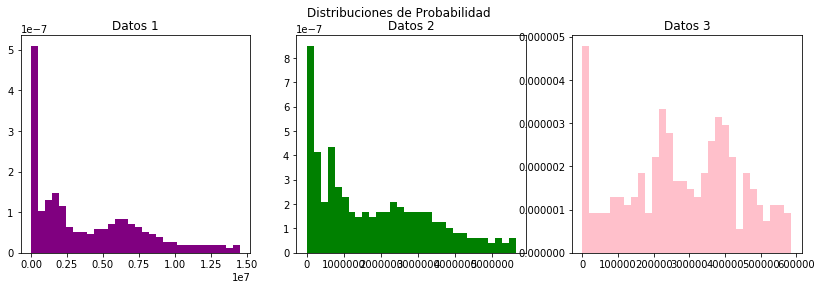

In [4]:
#Histogramas para ver comportamiento de todos los datos
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
fig.suptitle('Distribuciones de Probabilidad')
axs[0].hist(data['positive'], bins=30, density=True, color = 'purple');
axs[1].hist(data['recovered'], bins=30, density=True,color = 'green');
axs[2].hist(data['hospitalized'], bins=30, density=True,color = 'pink');
axs[0].set_title('Datos 1');
axs[1].set_title('Datos 2');
axs[2].set_title('Datos 3');
plt.show()

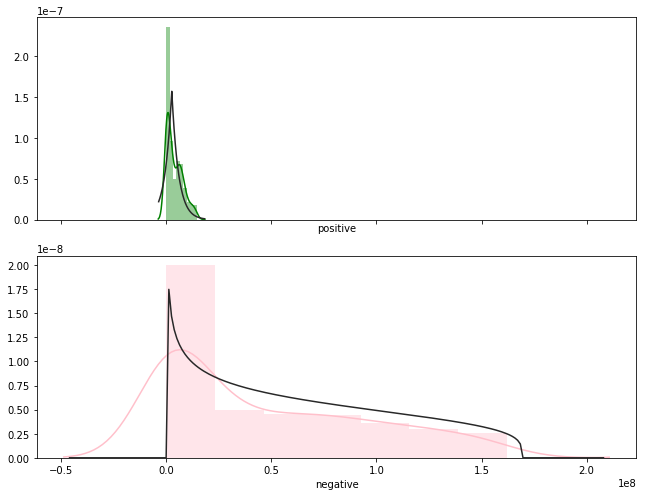

In [5]:
import seaborn as sns
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 7), sharex=True)
sns.distplot(data['positive'], color="green", fit=st.laplace, norm_hist=True, ax=axes[0])
sns.distplot(data['negative'], color="pink", fit=st.beta, norm_hist=True, ax=axes[1])
plt.tight_layout()

In [6]:
clean_data = pd.DataFrame()
# Filtrar las variables a analizar
clean_data['positives'] = data.T.loc['positive']
clean_data['recovered'] = data.T.loc['recovered']
clean_data['hospitalized'] = data.T.loc['hospitalizedCurrently']
clean_data['death'] = data.T.loc['death']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['death']))]
clean_data.set_index('index', inplace = True)
# Eliminar hasta primer positivo
clean_data = clean_data.iloc[37:,:]
# llenar valores nulos
clean_data.fillna(0,inplace = True)
# Mostrar la cola del data frame
clean_data.head()

,positives,recovered,hospitalized,death
index,,,,
37,0,0.0,0.0,4.0
38,18,0.0,0.0,5.0
39,50,0.0,0.0,8.0
40,94,0.0,0.0,11.0
41,145,0.0,0.0,14.0


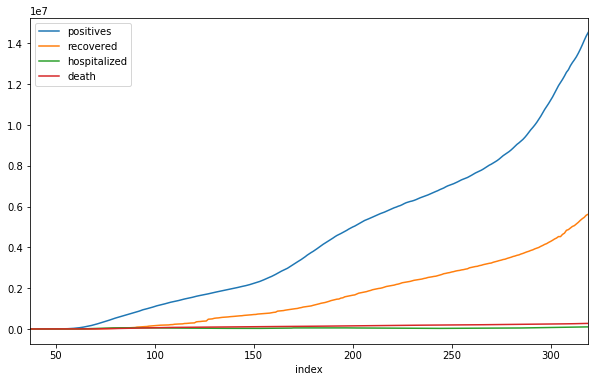

In [7]:
clean_data.plot(figsize=(10,6))

## Simulacion Montecarlo

### Nodo 1: Número de personas con hospitalización necesaria

In [8]:
# nombrar variable que contenga datos del df determinados
hospitalizados = clean_data['hospitalized']
hospitalizados.tail()

index
315    100322.0
316    100755.0
317    101276.0
318    101190.0
319    101487.0
Name: hospitalized, dtype: float64

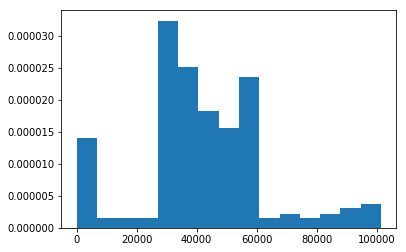

In [9]:
# Plotear histograma

J = 15 # Cantidad de particiones del histograma
[freq3, x_hist3, _]  = plt.hist(hospitalizados,bins = J, density = True); # plotear histograma
plt.show()
x_hist3 = x_hist3[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

El error de la distribucion genhalflogistic es de 91.34441371939397 %
El error de la distribucion bradford es de 90.41953732182891 %
El error de la distribucion kappa4 es de 94.07118304090231 %
El error de la distribucion gausshyper es de 92.22872464931284 %


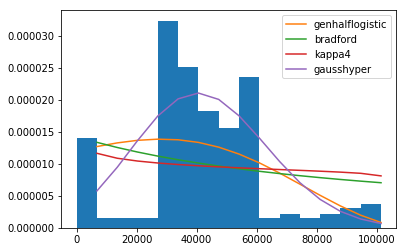

In [10]:
#Método de la transformada inversa estimación f 
#comprobación distribución probabilidad
data = hospitalizados

# Probar diferentes distirbuciones de probabilidad
dist_list = ['genhalflogistic', 'bradford', 'kappa4','gausshyper'] # distribuciones que tuvieron menos de 100% de error

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)/y_est).mean()*100,'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

La distribución con menor porcentaje de error fue la de Bradford, con un error del 90.42%

Se procede a la prueba de hipótesis para comprobar que la distribución de Bradford es la que mejor se ajusta.

Los supuestos que tomamos como base para la hipótesis son: 

>H0: los datos encontrados se distribuyen como una función de distribución de Bradford


>H1: los datos encontrados no se distribuyen como una función de distribución de Bradford

### Prueba de la chi cuadrada

In [11]:
param = getattr(st, 'bradford').fit(x_hist3) # obtener los parametros
pi = st.bradford.pdf(x_hist3, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist3*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq3 - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq3, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  7.724886737008872
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=7.724886737008872, pvalue=0.903160674216393)
Estadístico de chi_cuadrado =  23.684791304840576


El error es muy alto, el chi cuadrado teórico es más bajo que el estadístico

### KDE

In [12]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

C:\Users\masc0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


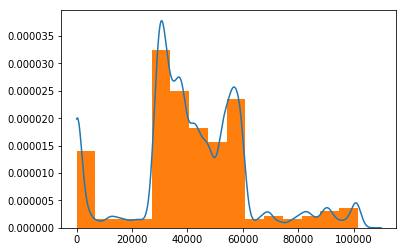

In [13]:
func_hospitalizados = kde_statsmodels_mf(hospitalizados)
x_h = np.arange(0,110000,100)
plt.figure()
plt.plot(x_h,func_hospitalizados(x_h));
plt.hist(hospitalizados,bins = 15, density = True);
plt.show()

### Aceptación rechazo con KDE

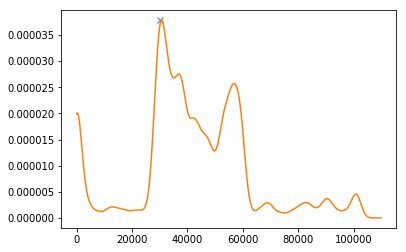

In [14]:
# la funcion obtenenida por kde es la siguiente
f = func_hospitalizados
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,110000,100)
max_fh = f(optimize.fmin(lambda x:-f(x),30000,disp=False))
plt.plot(30000,max_fh,'x',lw = 10)
plt.plot(x,func_hospitalizados(x))

La media por montecarlo crudo es de 42534.64048401541


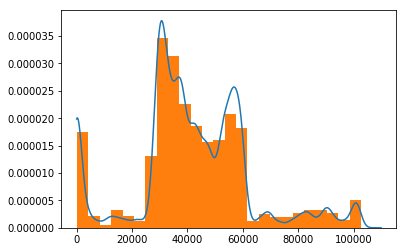

In [15]:
np.random.seed(8888) #VA M.crudo
def acep_rechazo_hospitalizados(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid muertos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,110000,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_hospitalizados # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_h = acep_rechazo_hospitalizados(f,max_fh,N)
len(var_aleatorias_montecarlo_h)
print('La media por montecarlo crudo es de', var_aleatorias_montecarlo_h.mean())
x = np.arange(0,110000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_h,bins = 25,density = True);
plt.show()

### Reducción de varianza

In [16]:
np.random.seed(88888)
def acep_rechazo_strat2_h(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3100
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 60000 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
N = 1000
var_aleatorias_strat2_h = acep_rechazo_strat2_h(f,max_fh,N)
len(var_aleatorias_strat2_h)

1000

La media de las variables generadas por estratificado con diferentes intervalos es de 35064.768697584834


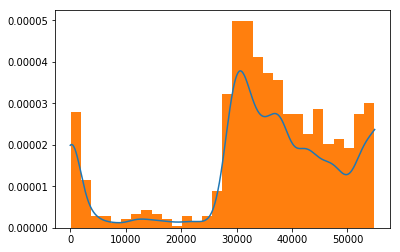

In [17]:
print('La media de las variables generadas por estratificado con diferentes intervalos es de',var_aleatorias_strat2_h.mean() )
x = np.arange(0,55000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat2_h,bins = 30,density = True);
plt.show()

*Por montecarlo crudo:*

In [18]:
# Calcular la media real de los hospitalizados
media_real_h= np.array(clean_data['hospitalized']).mean()
media_real_h

41690.56183745583

In [19]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_montecarlo_h
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_hospitalizados= np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_hospitalizados)
error_hospitalizados = abs(media_real_h - media_hospitalizados)/media_hospitalizados
print('El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de', error_hospitalizados*100,'%')

Con una confianza de 0.90 la media del numero de muertos por montecarlo crudo estará en el intervalo normal,
 (41437.4424481471, 43631.83851988371)
Media calculada del numero de muertos 42534.64048401541
El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de 1.9844499376379592 %


*Por estratificado:*

In [20]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_strat2_h
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_hospitalizados_strat = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_hospitalizados_strat)
error_hospitalizados = abs(media_real_h - media_hospitalizados_strat)/media_hospitalizados_strat
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_hospitalizados*100,'%')

Con una confianza de 0.90 la media del numero de muertos estará en el intervalo normal,
 (34369.66234688161, 35759.87504828806)
Media calculada del numero de muertos 35064.768697584834
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 18.895870088335606 %


*Como conclusiones para Montecarlo en nuestro nodo 3, al analizar los resultados obtenidos, podemos ver que el comportamiento de nuestro muestreo se modela de forma óptima con los casos positivos de COVID. Al aplicar KDE, se ajustó mejor a nuestros datos y nos da una idea más clara de su comportamiento, a pesar de ello en montecarlo crudo el porcentaje de error fue bajo y se acerca al KDE*

### Nodo 2: Número de defunciones

In [21]:
# nombrar variable que contenga datos del df determinados
muertos = clean_data['death']
muertos.head()

index
37     4.0
38     5.0
39     8.0
40    11.0
41    14.0
Name: death, dtype: float64

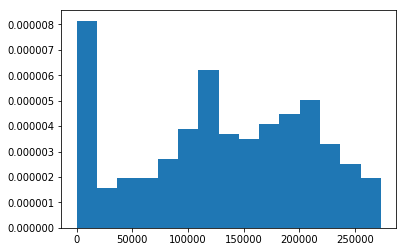

In [22]:
# Plotear histograma

J = 15  # Cantidad de particiones del histograma
[freq, x_hist, _]  = plt.hist(muertos,bins = J, density = True); # plotear histograma
plt.show()
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


El error de la distribucion alpha es de 257227.45251643533 %
El error de la distribucion expon es de 94.61058953563544 %
El error de la distribucion argus es de 48.32650783473886 %
El error de la distribucion bradford es de 37.17552924369189 %
El error de la distribucion burr es de 49.003381614936565 %


C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


El error de la distribucion genpareto es de 31.954628435327503 %
El error de la distribucion gennorm es de 35.99523411758809 %
El error de la distribucion kappa3 es de 45.17461090193832 %
El error de la distribucion kappa4 es de 34.04917646609001 %
El error de la distribucion ksone es de 35.99531760062262 %
El error de la distribucion uniform es de 35.99528857479387 %


C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


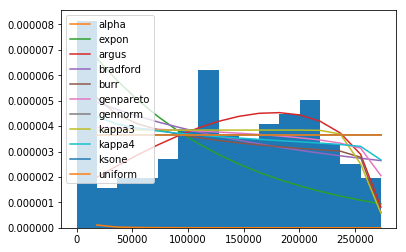

In [23]:
#Método de la transformada inversa estimación f 
#comprobación distribución probabilidad
data = muertos

# Probar diferentes distirbuciones de probabilidad
dist_list = ['alpha','expon','argus', 'bradford', 'burr', 'genpareto', 'gennorm', 'kappa3','kappa4','ksone','uniform']

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)/y_est).mean()*100,'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

La distribución con menor porcentaje de error fue la de Genpareto, con un error del 31.96%

Se procede a la prueba de hipótesis para comprobar que la distribución de Genpareto es la que mejor se ajusta.

Los supuestos que tomamos como base para la hipótesis son: 

>H0: los datos encontrados se distribuyen como una función de distribución de Genpareto


>H1: los datos encontrados no se distribuyen como una función de distribución de Genpareto

### Prueba de la chi cuadrada

In [24]:
param = getattr(st, 'genpareto').fit(x_hist) # obtener los parametros
pi = st.genpareto.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  8944.910566340446
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8944.910566340446, pvalue=0.0)
Estadístico de chi_cuadrado =  23.684791304840576


*Se acepta H0 por lo que la distribución que los datos siguen es como la función de Genpareto, y observando el p-value es alto por lo que no se rechaza.*


### Prueba Q-Q

C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2248: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)
C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu
C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


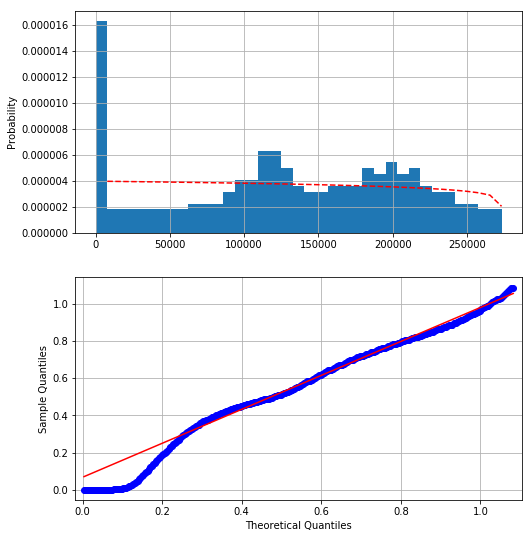

In [25]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 35, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'genpareto'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])

Al observar la gráfica de los quantiles, el módelo en su mayor composición se ajusta bien a la distribución Bradford y el error se vería concentrado mayormente en su cola final, a pesar de ello rechazamos H0.

### KDE

In [26]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

C:\Users\masc0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


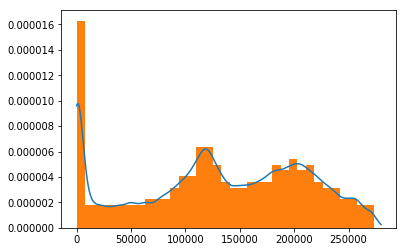

In [27]:
func_muertos = kde_statsmodels_mf(muertos)
x_m = np.arange(0.00002,280000,100)
plt.figure()
plt.plot(x_m,func_muertos(x_m));
plt.hist(muertos,bins = 35, density = True);
plt.show()

### Aceptación rechazo con KDE

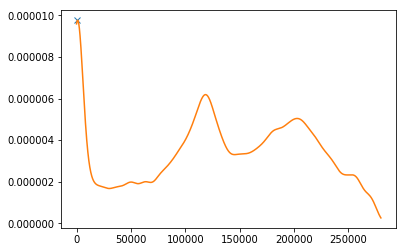

In [28]:
# la funcion obtenenida por kde es la siguiente
f = func_muertos
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0.00002,280000,100)
max_fm = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fm,'x',lw = 10)
plt.plot(x,func_muertos(x))

In [29]:
np.random.seed(666666) #generamos VA M. Crudo
def acep_rechazo_muertos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid muertos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,280000,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_muertos # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_m = acep_rechazo_muertos(f,max_fm,N)
len(var_aleatorias_montecarlo_m)

1000

La media por montecarlo crudo es de 134450.48227599054


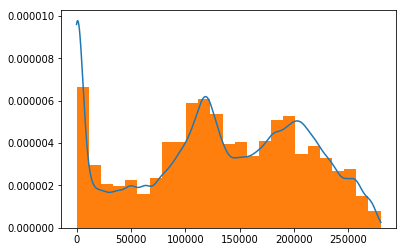

In [30]:
print('La media por montecarlo crudo es de', var_aleatorias_montecarlo_m.mean())
x = np.arange(0,280000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_m,bins = 25,density = True);
plt.show()

### Reducción de varianza

In [31]:
np.random.seed(66666) #VA 
def acep_rechazo_strat2_d(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3700
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 350000 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
N = 1000
var_aleatorias_strat2_d = acep_rechazo_strat2_d(f,max_fm,N)
len(var_aleatorias_strat2_d)

1000

La media de las variables generadas por estratificado con diferentes intervalos es de 130834.75458179307


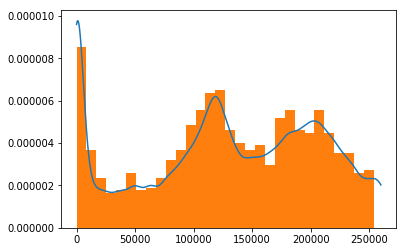

In [32]:
print('La media de las variables generadas por estratificado con diferentes intervalos es de',var_aleatorias_strat2_d.mean() )
x = np.arange(0,260000,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat2_d,bins = 30,density = True);
plt.show()

**Por montecarlo crudo:**

In [33]:
# Calcular la media real de los muertos
media_real_muertos = np.array(clean_data['death']).mean()
media_real_muertos

130553.30035335688

In [34]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_montecarlo_m
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_muertos= np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos por montecarlo crudo estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_muertos)
error_muertos = abs(media_real_muertos - media_muertos)/media_muertos
print('El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de', error_muertos*100,'%')

Con una confianza de 0.90 la media del numero de muertos por montecarlo crudo estará en el intervalo normal,
 (130650.98313978447, 138249.98141219662)
Media calculada del numero de muertos 134450.48227599054
El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de 2.8986001810196482 %


**Por estratificado:**

In [35]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_strat2_d 
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_muertos_strat = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de muertos estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_muertos_strat)
error_muertos = abs(media_real_muertos - media_muertos_strat)/media_muertos_strat
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_muertos*100,'%')

Con una confianza de 0.90 la media del numero de muertos estará en el intervalo normal,
 (127155.24181175718, 134514.26735182895)
Media calculada del numero de muertos 130834.75458179307
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 0.2151219141548713 %


**Como conclusiones para Montecarlo en nuestro nodo 2, al analizar los resultados obtenidos, podemos ver que el comportamiento de nuestro muestreo se modela de forma óptima con los casos de defunciones de COVID. Al aplicar KDE, se ajustó mejor a nuestros datos y nos da una idea más clara de su comportamiento.**

**En estratificado igualmente espaciado nuestra varianza disminuye, con un mejor modelado de los datos**

### Nodo 3: Numero de casos positivos

In [36]:
# nombrar variable que contenga datos del df determinados
positivos = clean_data['positives']
positivos.head()

index
37      0
38     18
39     50
40     94
41    145
Name: positives, dtype: int64

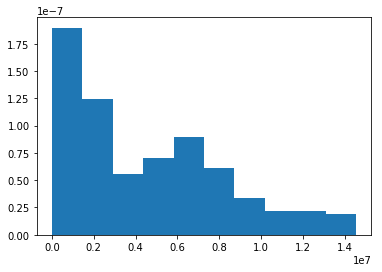

In [37]:
# plotear histograma de los datos

J = 10  # Cantidad de particiones del histograma
[freq, x_hist, _] = plt.hist(positivos,bins = J, density = True ); # histograma
plt.show() # mostrar histograma
x_hist = x_hist[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

El error de la distribucion bradford es de 39.91737224128213 %
El error de la distribucion beta es de 56.879456135667986 %
El error de la distribucion expon es de 49.88841527955815 %
El error de la distribucion exponnorm es de 49.76789936721404 %
El error de la distribucion norm es de 89.98723260527058 %
El error de la distribucion uniform es de 58.515901060070675 %
El error de la distribucion foldnorm es de 46.761414943070555 %
El error de la distribucion gennorm es de 58.51595522181064 %
El error de la distribucion ksone es de 58.51590106031322 %


C:\Users\masc0\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:79: RuntimeWarning: floating point number truncated to an integer
  return -scu._smirnovp(n, x)


El error de la distribucion kappa4 es de 52.34529239662067 %
El error de la distribucion johnsonsb es de 43.14388055951962 %


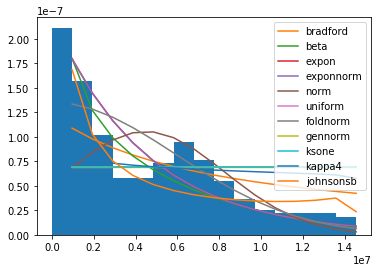

In [38]:
#Método de la transformada inversa estimación f 
#comprobación distribución probabilidad
data = positivos

# Probar diferentes distirbuciones de probabilidad
dist_list = ['bradford', 'beta','expon', 'exponnorm','norm','uniform','foldnorm', 'gennorm', 'ksone', 'kappa4', 'johnsonsb']

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)*100/y_est).mean(),'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

La distribución con menor porcentaje de error fue la de Bradford, con un error del 39.92%

Se procede a la prueba de hipótesis para comprobar que la distribución de Bradford es la que mejor se ajusta.

Los supuestos que tomamos como base para la hipótesis son: 

>H0: los datos encontrados se distribuyen como una función de distribución de Bradford


>H1: los datos encontrados no se distribuyen como una función de distribución de Bradford

### Prueba de la chi cuadrada

In [39]:
#Prueba de la chi cuadrada
param = getattr(st, 'bradford').fit(x_hist) # obtener los parametros
pi = st.bradford.pdf(x_hist, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  5.4559115402701535
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=5.4559115402701535, pvalue=0.7928936683306236)
Estadístico de chi_cuadrado =  16.918977604620448


Se acepta H0 por lo que la distribución que los datos siguen es como la función de Bradford, y observando el p-value es alto por lo que no se rechaza.

### Prueba Q-Q

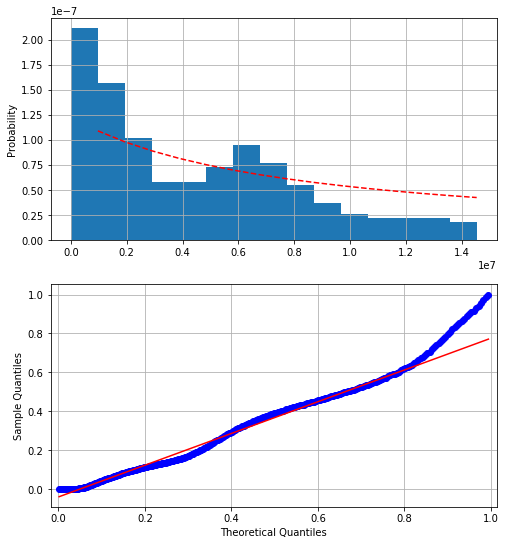

In [40]:
# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 15, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'bradford'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])

Al observar la gráfica de los quantiles, el módelo en su mayor composición se ajusta bien a la distribución Bradford y el error se vería concentrado mayormente en su cola final, a pesar de ello rechazamos H0.

### KDE

In [41]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

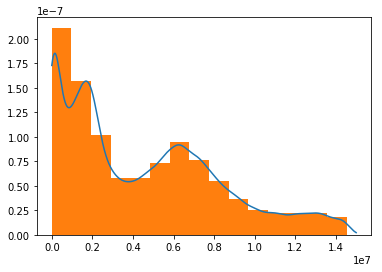

In [42]:
func_positivos = kde_statsmodels_mf(positivos)
x_g = np.arange(0,15e6,100)
plt.figure()
plt.plot(x_g,func_positivos(x_g));
plt.hist(positivos,bins = 15, density = True);
plt.show()

### Aceptación rechazo con KDE

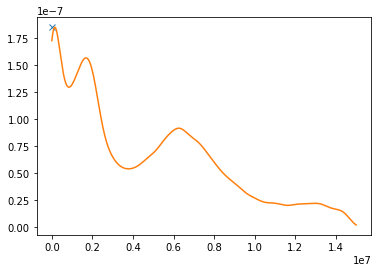

In [43]:
# la funcion obtenenida por kde es la siguiente
f = func_positivos
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,15e6,100)
max_fp = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0,max_fp,'x',lw = 10)
plt.plot(x,func_positivos(x))

In [44]:
np.random.seed(555555) #generación VA M. Crudo
def acep_rechazo_positivos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,13e6,1)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_positivos # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_p = acep_rechazo_positivos(f,max_fp,N)
len(var_aleatorias_montecarlo_p)

1000

La media de las variables generadas fue de  4315940.685947527


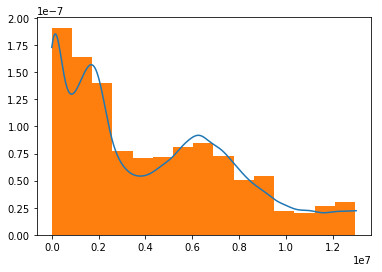

In [45]:
x = np.arange(0,13e6,100)
print('La media de las variables generadas fue de ', var_aleatorias_montecarlo_p.mean())

plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_p,bins = 15, density = True);
plt.show()

### Reducción de varianza

In [46]:
np.random.seed(33333) #generación VA
def acep_rechazo_strat_pos(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3500
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 18e6 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_strat_p = acep_rechazo_strat_pos(f,max_fp,N)
len(var_aleatorias_strat_p)

1000

La media de las variables aleatorias estratificadas es de 4656814.560835348


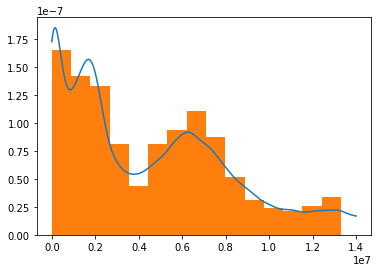

In [47]:
print('La media de las variables aleatorias estratificadas es de', var_aleatorias_strat_p.mean() )
x = np.arange(0,14e6,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat_p, bins = 15, density = True);
plt.show()

In [48]:
# Media real de los datos
media_real_positivos = clean_data['positives'].mean()
media_real_positivos

4481544.671378092

*Por montecarlo crudo:*

In [49]:
# Intervalos de confianza y media de los datos para metodo de montecarlo curdo
X = var_aleatorias_montecarlo_p
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_positivos = np.mean(X)

print('Con una confianza de %2.2f la media del numero de positivos por montecarlo crudo  estará en el intervalo normal,\n %s' %(confianza,i2))

Con una confianza de 0.90 la media del numero de positivos por montecarlo crudo  estará en el intervalo normal,
 (4138578.354280787, 4493303.017614267)


In [50]:
print('Media calculada por montecarlo crudo del numero de positivos' ,media_positivos)
error_positivos = abs(np.array(media_real_positivos - media_positivos)/media_positivos)
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_positivos*100,'%')

Media calculada por montecarlo crudo del numero de positivos 4315940.685947527
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 3.837031078062831 %


*Por estratificado:*

In [51]:
# Intervalos de confianza y media de los datos para metodo estratificado igualmente espaciado
X = var_aleatorias_strat_p 
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_positivos_strat = np.mean(X)
#print('Con una confianza de %2.2f la media del numero de positivos por estratificado estará en el intervalo t,\n %s' %(confianza,i1))
print('Con una confianza de %2.2f la media del numero de positivos por estratificado estará en el intervalo normal,\n %s' %(confianza,i2))

Con una confianza de 0.90 la media del numero de positivos por estratificado estará en el intervalo normal,
 (4476246.048488346, 4837383.07318235)


In [52]:
print('Media calculada por estratificado del numero de positivos' ,media_positivos_strat)
error_positivos = abs(np.array(clean_data['positives']).mean() - media_positivos_strat)/media_positivos_strat
print('El porcentaje de error entre la media real y la media estimada por estratificado con montecarlo fue de', error_positivos*100,'%')

Media calculada por estratificado del numero de positivos 4656814.560835348
El porcentaje de error entre la media real y la media estimada por estratificado con montecarlo fue de 3.7637292008856864 %


*Como conclusiones para Montecarlo en nuestro nodo 1, al analizar los resultados obtenidos, podemos ver que el comportamiento de nuestro muestreo se modela de forma óptima con los casos positivos de COVID. Al aplicar KDE, se ajustó mejor a nuestros datos y nos da una idea más clara de su comportamiento.*

### Nodo 4: Numero de casos recuperados

In [53]:
# nombrar variable que contenga datos del df determinados
recuperados = pd.DataFrame(clean_data['recovered'])
recuperados = np.array(recuperados.iloc[25:,:])

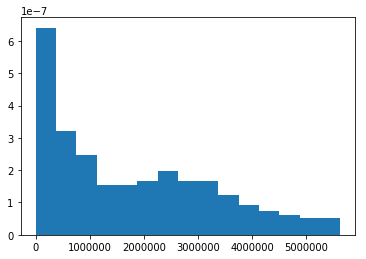

In [54]:
# Plotear histograma

J = 15# Cantidad de particiones del histograma
[freq4, x_hist4, _]  = plt.hist(recuperados, J, density = True); # plotear histograma
plt.show()
x_hist4 = x_hist4[1:] # Se obvia el último valor de x para obtener exactamente J muestras de x

El error de la distribucion bradford es de 32.66392966861504 %
El error de la distribucion expon es de 54.61315687191642 %
El error de la distribucion genhalflogistic es de 48.698568675745705 %
El error de la distribucion gumbel_r es de 67.46154925968209 %
El error de la distribucion genexpon es de 59.838316677173474 %
El error de la distribucion halflogistic es de 51.09375279209398 %
El error de la distribucion kappa4 es de 22.193113800433924 %
El error de la distribucion ksone es de 52.09302325683075 %


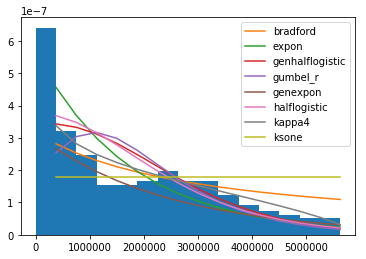

In [55]:
#Método de la transformada inversa estimación f 
#comprobación distribución probabilidad
data = recuperados

# Probar diferentes distirbuciones de probabilidad
dist_list = ['bradford','expon','genhalflogistic','gumbel_r','genexpon','halflogistic','kappa4','ksone']# distribuciones que tuvieron menos de 100% de error

y_real, x_real,  _ = plt.hist(data, bins = 15, density = True) #hacer histograma

x_real = x_real[1:] # modificar shape para que rea igual

#e = []
def distribucion(dist_list):
    
    def imprimir(dist):
        param = getattr(st, dist).fit(data)
        y_est = getattr(st, dist).pdf(x_real, *param)
        plt.plot(x_real,y_est, label = dist);
        print('El error de la distribucion', dist,'es de', (abs(y_real-y_est)/y_est).mean()*100,'%')
        
    [imprimir(dist) for dist in dist_list]


distribucion(dist_list)
plt.legend()
plt.show()

La distribución con menor porcentaje de error fue la de Kappa4, con un error del 22.19%

Se procede a la prueba de hipótesis para comprobar que la distribución de Kappa4 es la que mejor se ajusta.

Los supuestos que tomamos como base para la hipótesis son: 

>H0: los datos encontrados se distribuyen como una función de distribución de Kappa4


>H1: los datos encontrados no se distribuyen como una función de distribución de Kappa4


### Prueba de la chi cuadrada

In [56]:
param = getattr(st, 'kappa4').fit(x_hist4) # obtener los parametros
pi = st.kappa4.pdf(x_hist4, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_hist4*pi

# Cálculo teórico de la chi cuadrada
x2 = ((freq4 - Ei)**2 / Ei).sum()
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq4, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
m = J-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  8.529697770401977
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8.529697770401977, pvalue=0.8599482082363638)
Estadístico de chi_cuadrado =  23.684791304840576


*Al observar la distribución de Kappa4 podemos ver que modela los datos de forma bien ajustada, su porcentaje de error es el más bajo, el valor teórico de chi cuadrado es más bajo que el estadístico, se realiza Q-Q.*

### Prueba Q-Q

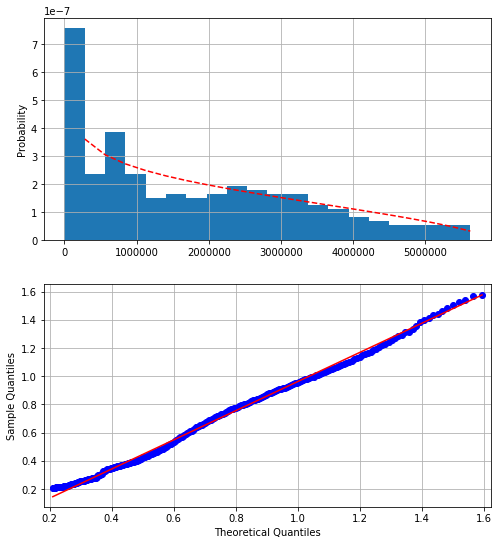

In [57]:
data = recuperados

# Histograma de las variables creadas
fig, ax = plt.subplots(2,1, figsize=(8,9))

y, x, _ = ax[0].hist(data,bins = 20, density=True)
x = x[1:]
plt.grid()
ax[0].grid()
#datos
dist = 'kappa4'
params = getattr(st, dist).fit(data)
# Graficar PDF de la distribución que queremos probar
y = getattr(st, dist).pdf(x, *params)
ax[0].plot(x,y,'r--')
ax[0].set_ylabel('Probability')

import statsmodels.api as sm 
grap1 = sm.qqplot(data, dist=dist, line='q', fit=True, ax=ax[1])

Al observar la gráfica de los quantiles, el módelo en su mayor composición se ajusta bien a la distribución Kappa4 y el error se vería concentrado muy poco en sus colas, a pesar de ello modelamos KDE.

### KDE

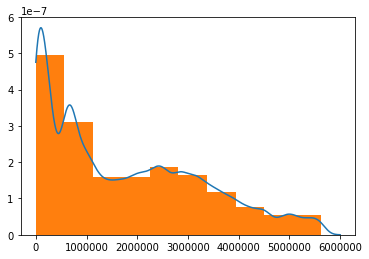

In [58]:
func_recuperados = kde_statsmodels_mf(recuperados)
x_r = np.arange(0,6e6,100)
plt.figure()
plt.plot(x_r,func_recuperados(x_r));
plt.hist(recuperados,bins = 10, density = True);
plt.show()

### Aceptación rechazo con KDE

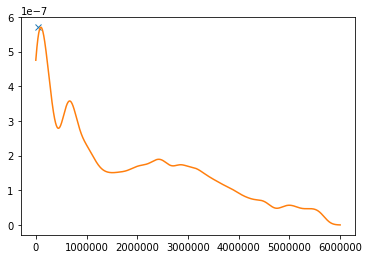

In [59]:
# la funcion obtenenida por kde es la siguiente
f = func_recuperados
# encontrar el maximo de la funcion y plotearlo
x = np.arange(0,6e6,100)
max_fr = f(optimize.fmin(lambda x:-f(x),0,disp=False))
plt.plot(0.05e6,max_fr,'x',lw = 10)
plt.plot(x,func_recuperados(x))

In [60]:
np.random.seed(66666) #VA M.Crudo
def acep_rechazo_recuperados(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid muertos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,3e6,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X


f = func_recuperados # funcion
N = 1000 # numero de variables que distribuyen como f a generar

# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
var_aleatorias_montecarlo_r = acep_rechazo_recuperados(f,max_fr,N)
len(var_aleatorias_montecarlo_r)

1000

La media por montecarlo crudo es de 1187416.045456798


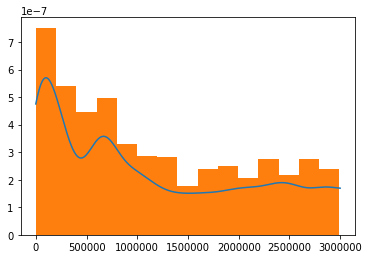

In [61]:
print('La media por montecarlo crudo es de', var_aleatorias_montecarlo_r.mean())
x = np.arange(0,3e6,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_montecarlo_r,bins = 15,density = True);
plt.show()

### Reducción de varianza

In [62]:
np.random.seed(66666)
def acep_rechazo_strat2_r(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar'):
    '''Funcion para hacer el metodo de aceptacion de rechazo especificamente para los datos de covid positivos,
    regresa las variables aleatorias aceptadas'''
    X = np.zeros(N)
    i = 0 
    B = 3300
    U2 = np.random.rand(B)
    k = np.arange(0,B)
    v = (U2+k)/B
    j = 0
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = 5e6 * v[j]
        j += 1
        if R2 < f([R1]):
            X[i] = R1
            i+=1
    return X 
    
# Usar func anteriormente definida como acep_rechazo_aleatorias que genera variables aleatorias
N = 1000
var_aleatorias_strat2_r = acep_rechazo_strat2_r(f,max_fr,N)
len(var_aleatorias_strat2_r)

1000

La media de las variables generadas por estratificado 1594048.9990252662


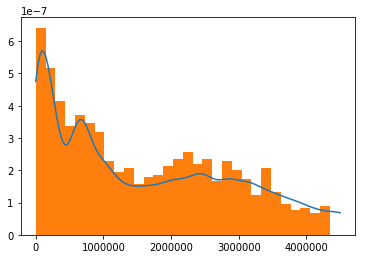

In [63]:
print('La media de las variables generadas por estratificado',var_aleatorias_strat2_r.mean() )
x = np.arange(0,4.5e6,100)
plt.figure()
plt.plot(x,f(x))
plt.hist(var_aleatorias_strat2_r,bins = 30,density = True);
plt.show()

**Por montecarlo crudo:**

In [64]:
# Calcular la media real de los hospitalizados
media_real_r= recuperados.mean()
media_real_r

1775155.2364341086

In [65]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_montecarlo_r
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_recuperados= np.mean(X)
print('Con una confianza de %2.2f la media del numero de recuperados por montecarlo crudo estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_recuperados)
error_recuperados= abs(media_real_r - media_recuperados)/media_recuperados
print('El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de', error_recuperados*100,'%')

Con una confianza de 0.90 la media del numero de recuperados por montecarlo crudo estará en el intervalo normal,
 (1140114.6985035504, 1234717.3924100457)
Media calculada del numero de muertos 1187416.045456798
El porcentaje de error entre la media real y la media estimada con montecarlo crudo fue de 49.497325998421026 %


**Por estratificado:**

In [66]:
# Intervalos de confianza y media de los datos
X = var_aleatorias_strat2_r
confianza = 0.90
i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
media_recuperados_strat = np.mean(X)
print('Con una confianza de %2.2f la media del numero de recuperados estará en el intervalo normal,\n %s' %(confianza,i2))
print('Media calculada del numero de muertos' ,media_recuperados_strat)
error_recuperados = abs(media_real_r - media_recuperados_strat)/media_recuperados_strat
print('El porcentaje de error entre la media real y la media estimada con montecarlo fue de', error_recuperados*100,'%')

Con una confianza de 0.90 la media del numero de recuperados estará en el intervalo normal,
 (1531233.292326713, 1656864.7057238193)
Media calculada del numero de muertos 1594048.9990252662
El porcentaje de error entre la media real y la media estimada con montecarlo fue de 11.361397141467156 %


**Para este nodo, desde la prueba Q-Q el ajuste era mucho mejor que en otros y al llegar a KDE esto se confirma.**

### Conclusiones

Este proyecto nos ayudo mucho mas a entender y poder practicar los distintos temas y actividades realizadas alrededor del curso, el uso que hicimos en este proyecto de lo visto en clase fue muy importante ya que refleja los conocimientos y el trabajo en equipo para lograr los resultados esperados en este proyecto final.

Como pudimos observar en el proyecto nuestro tema principal fue el covid-19 una sitacion bastante desafortunada para todo el mundo, algo que cambio la vida de las personas para siempre, independientemente de la base de datos o los temas seleccionados lo aprendido en el curso nos ayuda a comprender y poder simular lo que nos guste modelar.

Mediante el analisis que vimos alrededor del proyecto podemos observar como Estados Unidos fue uno de los paises bastante afectados por el virus, con un indice de mortalidad bastante alto y con numeros de contagios los cuales en un inicio fueron muy graves.

Las distintas vacunas implementadas en el pais podemos decir que ayudo a prevenir o ayudar a la tasa de mortalidad, aunque los contagios siguieron siendo importantes.